# Part I : Quel(le) data scientist êtes-vous ?
## Contexte de l’analyse

Elu métier le plus sexy par la Harvard Business Review en octobre 2012, le data scientist représente un profil rare qui exige de nombreuses compétences.

A partir d'un dataset Aquila, vous réaliserez :
- un clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- une prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


## Répondez aux questions 

Bonne chance!

In [1]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### 1) Importer le tableau de données dans un dataframe 

In [3]:
# Import du dataframe "data.csv"
df = pd.read_csv('data.csv', decimal=",")

### 2) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes? 

In [4]:
df.head(10)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6.0,Lille
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0.0,Lille
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4.0,Toulouse
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8.0,Paris
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5.0,Toulouse


In [5]:
# Affiche le nombre de lignes et de colonnes de notre dataset
df.shape

(9582, 6)

In [6]:
# Afficher le nombre de valeurs manquantes par colonne
print(df.isnull().sum())

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64


#### <span style="color : green">Reponse Question 2 :</span>
* Combien y a-t-il d'observations dans ce dataset? : <span style="color : blue"> Ce dataset contient 9582 observations </span>
* Y a-t-il des valeurs manquantes ? : <span style="color : blue"> Notre dataset contient des valeurs manquantes sur trois colonnes : </span>
 <ol>
  <span style="color : blue"> <li type = "square">La colonne Entreprise contient 17 valeurs manquantes</li></span>
  <span style="color : blue"> <li type = "square">La colonne Metier contient 19 valeurs manquantes</li></span>
  <span style="color : blue"> <li type = "square">La colonne Experience contient 94 valeurs manquantes</li></span>
</ol> 

### 3) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

In [7]:
# Pour visualiser le type de données des colonnes
df.dtypes

Entreprise       object
Metier           object
Technologies     object
Diplome          object
Experience      float64
Ville            object
dtype: object

In [8]:
#Extraction de la moyenne et de la médiane
mean_experience = df["Experience"].mean()
median_experience = df["Experience"].median()
# Remplacer les valeurs manquantes pour data scientists par la médiane
df["Experience"] = np.where(df["Experience"].isin([np.nan]) & df["Metier"].isin(["Data scientist"]), median_experience, df["Experience"])
# Remplacer les valeurs manquantes pour data engineers par la moyenne
df["Experience"] = np.where(df["Experience"].isin([np.nan]) & df["Metier"].isin(["Data engineer"]), mean_experience, df["Experience"])
# Remplacer les valeurs manquantes restantes par la mediane
df["Experience"] = np.where(df["Experience"].isin([np.nan]), median_experience, df["Experience"])

### 4) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne?

In [9]:
df[df["Metier"] == "Data scientist"]["Experience"].mean()

2.241267787839586

In [10]:
df[df["Metier"] == "Data architecte"]["Experience"].mean()

2.989637305699482

In [11]:
df[df["Metier"] == "Lead data scientist"]["Experience"].mean()

3.9348534201954397

#### <span style="color : green">Reponse Question 4 :</span>
* Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne?: <span style="color : blue"> Les années d'expériences en moyenne de : </span>
 <ol>
  <span style="color : blue"> <li type = "square">Data scientist : 2.24 années </li></span>
  <span style="color : blue"> <li type = "square">Data architecte : 3.00 années</li></span>
  <span style="color : blue"> <li type = "square">Lead data scientist : 3.96 années</li></span>
</ol> 

### 5) Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier

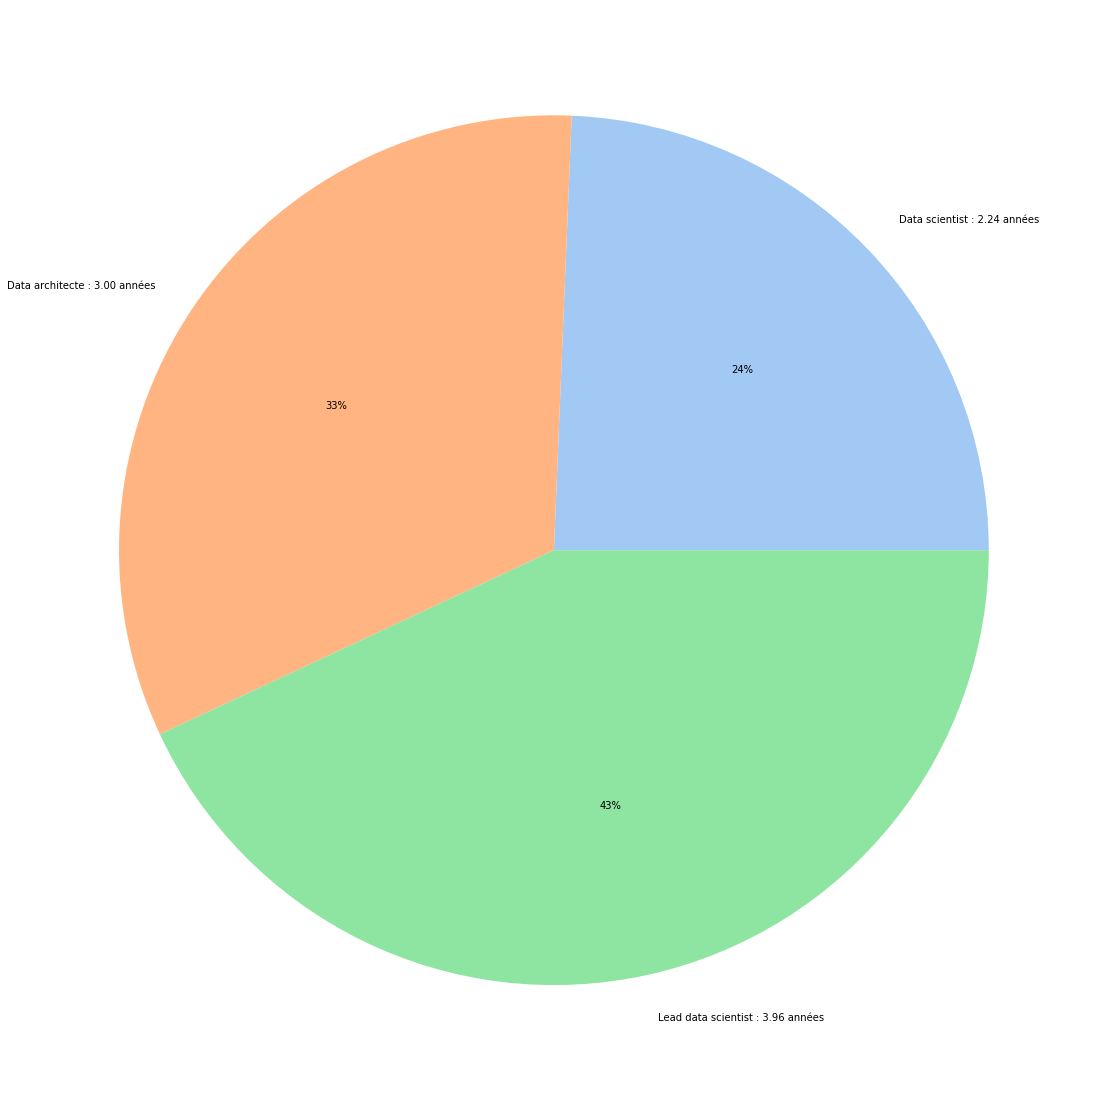

In [12]:
#Les données utilisées sous forme de listes
data = [2.24, 3.00, 3.96]
labels = ['Data scientist : 2.24 années', 'Data architecte : 3.00 années', 'Lead data scientist : 3.96 années']

#Nombre de couleur de Seaborn color
colors = sb.color_palette('pastel')[0:3]

#creation du graphe
plt.figure(figsize=(20, 20))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

#### <span style="color : green">Reponse Question 5 :</span>
* Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier?: <span style="color : blue"> À travers la figure ci-dessus, nous pouvons voir qu'en moyenne, les Lead Data Scientists ont plus d'années d'expérience. Un peu moins du double de celle des Data Scientists qui ont le moins d'expérience. Et environ 4/3 du nombre d'années d'expériences des Data Architects
    </span>

In [13]:
df

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux
...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),Data scientist,C++/R/Python/Matlab/Matplotlib,Master,1.5,Lyon
9578,Charles River Analytics,Data scientist,Excel/Python/Matlab/R/machine learning/anglais,Master,11.0,Toulouse
9579,Ball Aerospace,Data scientist,R/machine learning/Excel/VBA,Master,1.0,Paris
9580,Takeda Pharmaceutical,Data scientist,Python/Pyspark/machine learning/Microsoft Azure,Master,17.0,Rennes


### 6) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert
- Veuillez expliquer votre choix du règle de transformation.  

In [14]:
list_expereince_values = df.Experience.values
median_toutes_les_donnees = np.median(list_expereince_values[~np.isnan(list_expereince_values)])
median_inf_median_1 = np.median(list_expereince_values[list_expereince_values <=median_toutes_les_donnees])
median_sup_median_2 = np.median(list_expereince_values[list_expereince_values>median_toutes_les_donnees])

In [15]:
df["Exp_label"] = df["Experience"]*0
df["Exp_label"] = np.where(df["Experience"] < median_inf_median_1, "Débutant", df["Exp_label"])
df["Exp_label"] = np.where(df["Experience"] >= median_sup_median_2, "Confirmé", df["Exp_label"])
df["Exp_label"] = np.where((df["Experience"]>=median_inf_median_1) & (df["Experience"]<median_toutes_les_donnees),  "Avancé", df["Exp_label"])
df["Exp_label"] = np.where((df["Experience"]>=median_toutes_les_donnees) & (df["Experience"]<=median_sup_median_2),  "Expert", df["Exp_label"])

In [16]:
df.head(10)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,Avancé
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,Expert
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,Expert
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,Avancé
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,Expert
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6.0,Lille,Confirmé
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0.0,Lille,Débutant
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4.0,Toulouse,Confirmé
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8.0,Paris,Confirmé
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5.0,Toulouse,Confirmé


#### <span style="color : green">Reponse Question 6 :</span>
* Explication règle de transformation : <span style="color : blue"> Pour transformer la variable Expérience en 4 modalités, nous avons divisé les valeurs contenues dans Expérience en 4 parties en utilisant la médiane. On commence par diviser Expérience en deux parties ou l'une des parties contient les valeurs inférieures à la médiane nommée median_0 et l'autres parties les valeurs supérieures à la médiane. Ensuite, on prend la partie inférieure de notre subdivision en le re-divisant de la même manière avec la médiane de cette partie qu'on nommera median_1. On refait la même chose avec la partie supérieure qu'on nommera median_2. Ainsi nos 4 parties contient respectivement les 4 catégories de notre subdivisions suivant les médianes. On a : </span>
<ol>
  <span style="color : blue"> <li type = "square">Débutant : [0; median_1[</li></span>
  <span style="color : blue"> <li type = "square">Confirmée : [median_1; median_0[</li></span>
  <span style="color : blue"> <li type = "square">Avancé : [median_0; median_2[</li></span>
  <span style="color : blue"> <li type = "square">Expert : [median_2; +inf[</li></span>

</ol> 

### 7) Quelles sont les 5 technologies les plus utilisées? Faites un graphique

In [17]:
technologies_utilisees = dict()
for un_elements in list(df["Technologies"]):
    resultats_split_liste_technologie = un_elements.split("/")
    for one_result_split in resultats_split_liste_technologie:
        if one_result_split in technologies_utilisees:
            technologies_utilisees[one_result_split]+=1
        else:
            technologies_utilisees[one_result_split] = 1
del technologies_utilisees[""]

dict_trier_technologies_utilisees = dict()
for k, v in sorted(technologies_utilisees.items(), key=lambda x: x[1],reverse=True):
    dict_trier_technologies_utilisees[k] = v

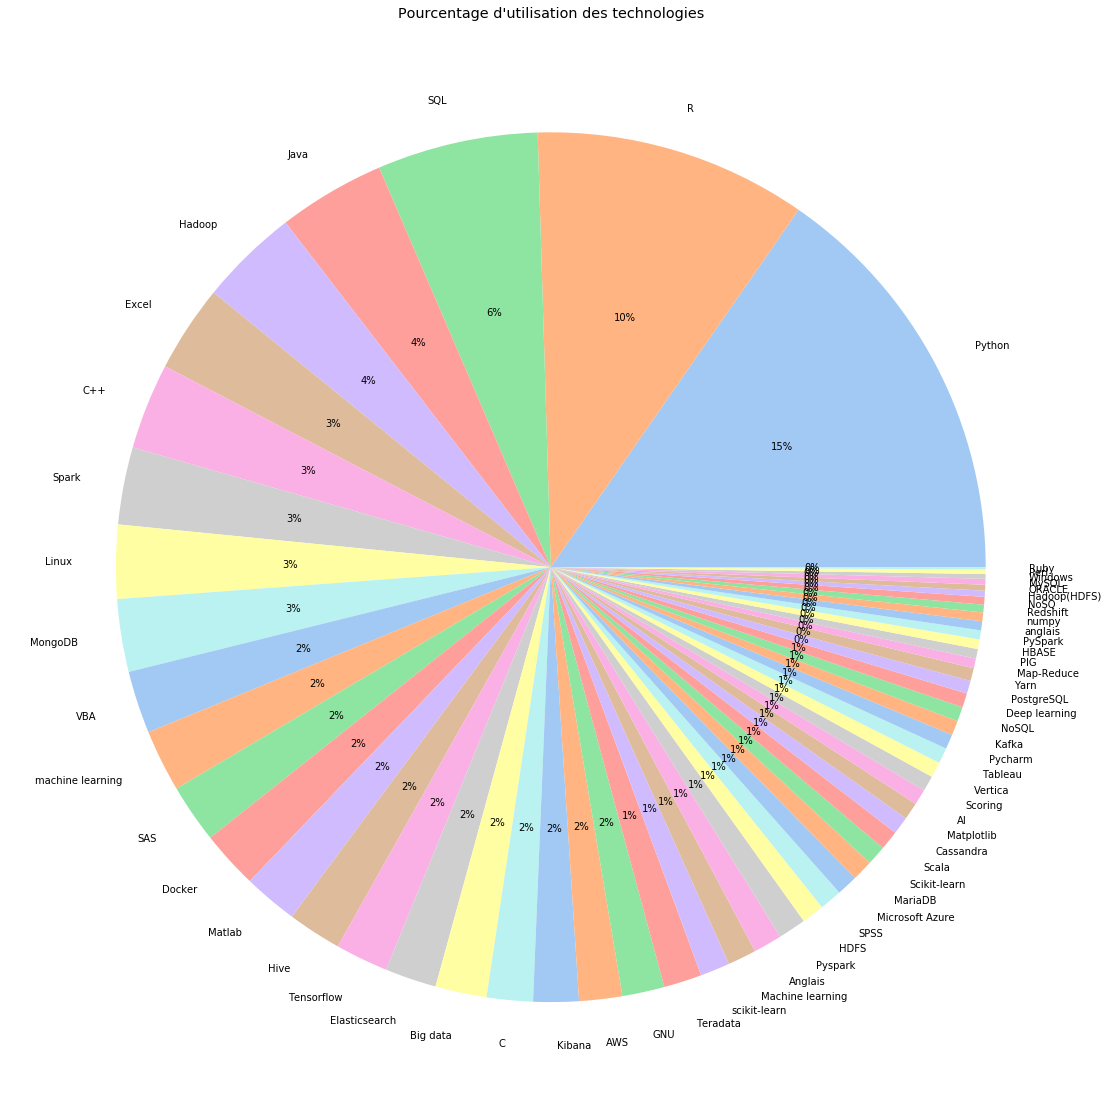

In [18]:
#Les données utilisées sous forme de listes
nombre_d_utilisateur_technologie = list(dict_trier_technologies_utilisees.values())
labels_technologies = list(dict_trier_technologies_utilisees.keys())

#Nombre de couleur de Seaborn color
colors = sb.color_palette('pastel')[0:10]

#creation du graphe
plt.figure(figsize=(20, 20))
plt.title("Pourcentage d'utilisation des technologies")
plt.pie(nombre_d_utilisateur_technologie, labels = labels_technologies, colors = colors, autopct='%.0f%%')
plt.show()

#### <span style="color : green">Reponse Question 7 :</span>
* Quelles sont les 5 technologies les plus utilisées?: <span style="color : blue"> Les 5 technologies les plus utilisées sont : </span>
 <ol>
  <span style="color : blue"> <li type = "square">Python : Utilisé par plus de 15% des profiles</li></span>
  <span style="color : blue"> <li type = "square">R : Utilisé par plus de 10% des profiles</li></span>
  <span style="color : blue"> <li type = "square">SQL : Utilisé par plus de 6% des profiles</li></span>
  <span style="color : blue"> <li type = "square">Java : Utilisé par plus de 4% des profiles</li></span>
  <span style="color : blue"> <li type = "square">Hadoop : Utilisé par plus de 4% des profiles</li></span>
</ol> 

In [19]:
df

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,Avancé
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,Expert
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,Expert
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,Avancé
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,Expert
...,...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),Data scientist,C++/R/Python/Matlab/Matplotlib,Master,1.5,Lyon,Avancé
9578,Charles River Analytics,Data scientist,Excel/Python/Matlab/R/machine learning/anglais,Master,11.0,Toulouse,Confirmé
9579,Ball Aerospace,Data scientist,R/machine learning/Excel/VBA,Master,1.0,Paris,Avancé
9580,Takeda Pharmaceutical,Data scientist,Python/Pyspark/machine learning/Microsoft Azure,Master,17.0,Rennes,Confirmé


### 8) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître 2 clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

In [20]:
print(df.isnull().sum())

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience       0
Ville            0
Exp_label        0
dtype: int64


Nous constatons qu'après notre première imputation des données manquantes, il nous reste des données dans les entreprises et professions. Comme les lignes présentant des données manquantes pour Metier et Entreprise ne sont pas nombreuses (17 et 19 sur 9582), nous supprimerons les lignes des colonnes Profession et Entreprise présentant des données manquantes.

In [21]:
# Suppression des valeurs manquantes
result_suppression_des_donnees_manquantes = df.dropna()

In [22]:
# Transformation de la colonne Technologie en liste
result_suppression_des_donnees_manquantes["Technologies_split"]=result_suppression_des_donnees_manquantes["Technologies"].apply(lambda x:x.split("/"))

/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
#Création de nouvelle ligne basée sur la liste Technologie
result_suppression_des_donnees_manquantes = result_suppression_des_donnees_manquantes.explode('Technologies_split')

In [24]:
list_enc = ['Enc_Metier', 'Enc_Diplome', 'Enc_Ville', 'Enc_Exp_label', 'Enc_Technologies_split']
for one_element in list_enc:
    result_suppression_des_donnees_manquantes[one_element] = result_suppression_des_donnees_manquantes["Experience"]

In [25]:
# Suppression des colonnes Technologie, Experiences, Entreprise
result_suppression_des_donnees_manquantes = result_suppression_des_donnees_manquantes.drop(['Technologies'],axis=1).drop(['Experience'],axis=1).drop(['Entreprise'],axis=1)

In [26]:
result_suppression_des_donnees_manquantes

,Metier,Diplome,Ville,Exp_label,Technologies_split,Enc_Metier,Enc_Diplome,Enc_Ville,Enc_Exp_label,Enc_Technologies_split
0,Data scientist,Master,Paris,Avancé,Matlab,1.0,1.0,1.0,1.0,1.0
0,Data scientist,Master,Paris,Avancé,Python,1.0,1.0,1.0,1.0,1.0
0,Data scientist,Master,Paris,Avancé,Pyspark,1.0,1.0,1.0,1.0,1.0
0,Data scientist,Master,Paris,Avancé,Scikit-learn,1.0,1.0,1.0,1.0,1.0
0,Data scientist,Master,Paris,Avancé,Tensorflow,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
9580,Data scientist,Master,Rennes,Confirmé,Microsoft Azure,17.0,17.0,17.0,17.0,17.0
9581,Data scientist,Phd,Paris,Débutant,VBA,0.0,0.0,0.0,0.0,0.0
9581,Data scientist,Phd,Paris,Débutant,Python,0.0,0.0,0.0,0.0,0.0
9581,Data scientist,Phd,Paris,Débutant,Excel,0.0,0.0,0.0,0.0,0.0


In [27]:
# Transformation des données Catégorielle
encoder = sk.preprocessing.OrdinalEncoder()
encoder.fit(result_suppression_des_donnees_manquantes[['Metier', 'Diplome', 'Ville', 'Exp_label', 'Technologies_split']])
result_suppression_des_donnees_manquantes[['Enc_Metier', 'Enc_Diplome', 'Enc_Ville', 'Enc_Exp_label', 'Enc_Technologies_split']] = encoder.transform(result_suppression_des_donnees_manquantes[['Metier', 'Diplome', 'Ville', 'Exp_label', 'Technologies_split']])

In [28]:
result_suppression_des_donnees_manquantes

,Metier,Diplome,Ville,Exp_label,Technologies_split,Enc_Metier,Enc_Diplome,Enc_Ville,Enc_Exp_label,Enc_Technologies_split
0,Data scientist,Master,Paris,Avancé,Matlab,2.0,1.0,8.0,0.0,25.0
0,Data scientist,Master,Paris,Avancé,Python,2.0,1.0,8.0,0.0,39.0
0,Data scientist,Master,Paris,Avancé,Pyspark,2.0,1.0,8.0,0.0,38.0
0,Data scientist,Master,Paris,Avancé,Scikit-learn,2.0,1.0,8.0,0.0,47.0
0,Data scientist,Master,Paris,Avancé,Tensorflow,2.0,1.0,8.0,0.0,51.0
...,...,...,...,...,...,...,...,...,...,...
9580,Data scientist,Master,Rennes,Confirmé,Microsoft Azure,2.0,1.0,9.0,1.0,27.0
9581,Data scientist,Phd,Paris,Débutant,VBA,2.0,3.0,8.0,2.0,53.0
9581,Data scientist,Phd,Paris,Débutant,Python,2.0,3.0,8.0,2.0,39.0
9581,Data scientist,Phd,Paris,Débutant,Excel,2.0,3.0,8.0,2.0,11.0


In [29]:
scaler = sk.preprocessing.StandardScaler()
scaler.fit(result_suppression_des_donnees_manquantes[['Enc_Metier', 'Enc_Diplome', 'Enc_Ville', 'Enc_Exp_label', 'Enc_Technologies_split']].values)
scaled_features = scaler.transform(result_suppression_des_donnees_manquantes[['Enc_Metier', 'Enc_Diplome', 'Enc_Ville', 'Enc_Exp_label', 'Enc_Technologies_split']].values)

In [30]:
scaled_features

array([[ 0.44740593, -0.44179411,  0.55593087, -1.49154835, -0.32244545],
       [ 0.44740593, -0.44179411,  0.55593087, -1.49154835,  0.52576136],
       [ 0.44740593, -0.44179411,  0.55593087, -1.49154835,  0.46517516],
       ...,
       [ 0.44740593,  1.52964956,  0.55593087,  0.21839176,  0.52576136],
       [ 0.44740593,  1.52964956,  0.55593087,  0.21839176, -1.17065225],
       [ 0.44740593,  1.52964956,  0.55593087,  0.21839176,  0.58634756]])

In [31]:
# K-means Clustering
# On peut Améliorer l'algorithme en utilisant le kmeans++ qui consiste à changer l'initialisation aléatoire...
kmeans = sk.cluster.KMeans(init="random", n_clusters=2, n_init=10, max_iter=300, random_state=42)
kmeans.fit(scaled_features)
result_suppression_des_donnees_manquantes["resultClustering"] = kmeans.labels_

In [32]:
result_suppression_des_donnees_manquantes

,Metier,Diplome,Ville,Exp_label,Technologies_split,Enc_Metier,Enc_Diplome,Enc_Ville,Enc_Exp_label,Enc_Technologies_split,resultClustering
0,Data scientist,Master,Paris,Avancé,Matlab,2.0,1.0,8.0,0.0,25.0,0
0,Data scientist,Master,Paris,Avancé,Python,2.0,1.0,8.0,0.0,39.0,1
0,Data scientist,Master,Paris,Avancé,Pyspark,2.0,1.0,8.0,0.0,38.0,1
0,Data scientist,Master,Paris,Avancé,Scikit-learn,2.0,1.0,8.0,0.0,47.0,1
0,Data scientist,Master,Paris,Avancé,Tensorflow,2.0,1.0,8.0,0.0,51.0,1
...,...,...,...,...,...,...,...,...,...,...,...
9580,Data scientist,Master,Rennes,Confirmé,Microsoft Azure,2.0,1.0,9.0,1.0,27.0,1
9581,Data scientist,Phd,Paris,Débutant,VBA,2.0,3.0,8.0,2.0,53.0,1
9581,Data scientist,Phd,Paris,Débutant,Python,2.0,3.0,8.0,2.0,39.0,1
9581,Data scientist,Phd,Paris,Débutant,Excel,2.0,3.0,8.0,2.0,11.0,0


#### Au final, la classe d'un profit sera égale à la classe qui apparaît le plus après pour ce profil après le clustering basé sur les données dont les compétences split. Ci-dessous, nous reconstruisons les classes finales de chaque profil.

In [33]:
result_suppression_des_donnees_manquantes_sans_split = df.dropna()

In [34]:
list_classe_final = []
for one_index in list(result_suppression_des_donnees_manquantes_sans_split.index):
    tampon_sum = result_suppression_des_donnees_manquantes.loc[one_index]["resultClustering"].values
    if(sum(tampon_sum)>len(tampon_sum)/2):
        list_classe_final.append(1)
    else:
        list_classe_final.append(0)
result_suppression_des_donnees_manquantes_sans_split["resultClustering"] = np.array(list_classe_final)

/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
# Resultat Final du clustering
result_suppression_des_donnees_manquantes_sans_split

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label,resultClustering
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,Avancé,1
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,Expert,0
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,Expert,1
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,Avancé,0
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,Expert,1
...,...,...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),Data scientist,C++/R/Python/Matlab/Matplotlib,Master,1.5,Lyon,Avancé,0
9578,Charles River Analytics,Data scientist,Excel/Python/Matlab/R/machine learning/anglais,Master,11.0,Toulouse,Confirmé,1
9579,Ball Aerospace,Data scientist,R/machine learning/Excel/VBA,Master,1.0,Paris,Avancé,1
9580,Takeda Pharmaceutical,Data scientist,Python/Pyspark/machine learning/Microsoft Azure,Master,17.0,Rennes,Confirmé,1


In [36]:
#Inertie
kmeans.inertia_

175546.644922878

In [37]:
# K-means Center
kmeans.cluster_centers_

array([[-0.65096733, -0.17001794, -0.02655726, -0.14309075, -0.76448553],
       [ 0.59534598,  0.1554909 ,  0.0242881 ,  0.13086448,  0.69916472]])

In [38]:
# Number iteration
kmeans.n_iter_

12

In [39]:
sk.metrics.silhouette_score(scaled_features, kmeans.labels_)

0.19335451431284936

#### <span style="color : green">Reponse Question 8 :</span>
* Justifier la performance de votre algorithme grâce à une métrique: <span style="color : blue"> Mesure de la Performance de notre méthode avec le coefficient de silhouette : </span>
 <ol>
  <span style="color : blue"> <li type = "square">Le coefficient de silhouette est une mesure de la cohésion et de la séparation des clusters. Il quantifie à quel point un point de données s'intègre dans son cluster.</li></span>
    <span style="color : blue"> <li type = "square">En mesurant le coefficient de silhouette, on obtient la valeur. Or le coefficient de silhouette compris entre -1 et 1 indique un bon cluster d'autant plus que la valeur est proche de 1. En faisant attention de ne pas le gonfler artificiellement en mettant un grand nombre de clusters. On peut ainsi dire qu'avec 0.19, notre clustering est satisfaisant.</li></span>
</ol> 

### 9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

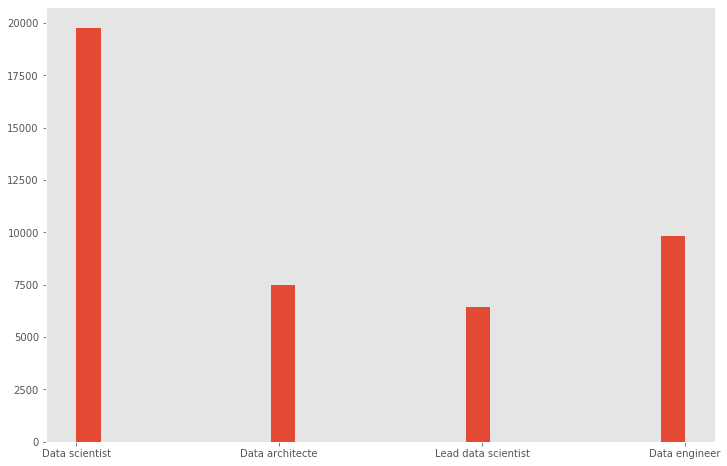

In [40]:
result_suppression_des_donnees_manquantes.Metier.hist(bins=25, grid=False, figsize=(12,8))

Ici, on peut voir que la répartition des targets est plutôt acceptable donc on n'a pas besoin de faire un traitement particulier (du type resampling) avec ces données.

##### Preprocessing des données

In [41]:
# Transformation des données Catégorielle
encoder = sk.preprocessing.OrdinalEncoder()
encoder.fit(result_suppression_des_donnees_manquantes[['Diplome', 'Ville', 'Exp_label', 'Technologies_split']])
result_suppression_des_donnees_manquantes[['Enc_Diplome', 'Enc_Ville', 'Enc_Exp_label', 'Enc_Technologies_split']] = encoder.transform(result_suppression_des_donnees_manquantes[['Diplome', 'Ville', 'Exp_label', 'Technologies_split']])

# Scaler
scaler = sk.preprocessing.StandardScaler()
scaler.fit(result_suppression_des_donnees_manquantes[['Enc_Diplome', 'Enc_Ville', 'Enc_Exp_label', 'Enc_Technologies_split']].values)
scaled_features = scaler.transform(result_suppression_des_donnees_manquantes[['Enc_Diplome', 'Enc_Ville', 'Enc_Exp_label', 'Enc_Technologies_split']].values)

In [42]:
OneVsRestClassifier_GradientBoostingClassifier = sk.multiclass.OneVsRestClassifier(sk.ensemble.GradientBoostingClassifier(n_estimators= 200, learning_rate= 0.1))

In [43]:
sk.model_selection.cross_val_score(OneVsRestClassifier_GradientBoostingClassifier, scaled_features, result_suppression_des_donnees_manquantes["Metier"].values, cv=5, scoring='accuracy')

array([0.66593937, 0.67099219, 0.67382566, 0.67577811, 0.66854255])

In [44]:
#mod_gb = sk.multiclass.OneVsRestClassifier(sk.ensemble.GradientBoostingClassifier())
# J'ai juste spécifié quelques paramètres, on peut aller plus loin dans notre recherche de meilleurs paramètres 
#param_dist_gb = {"learning_rate": [0.01, 0.05, 0.1, 0.5],
#              "n_estimators": [10,50,100,200,500]}

# run randomized search
#n_iter_search = 20
#random_search_gb = sk.model_selection.GridSearchCV(mod_gb, 
#                                                         param_grid=param_dist_gb,
#                                                         scoring='accuracy',
#                                                         cv=5, 
#                                                         n_jobs=-1)
#random_search_gb = sk.model_selection.RandomizedSearchCV(mod_gb, 
#                                                         param_distributions=param_dist_gb,
#                                                         scoring='accuracy',
#                                                         n_iter=n_iter_search, 
#                                                         cv=5, 
#                                                         n_jobs=-1)

#random_search_gb.fit(scaled_features, result_suppression_des_donnees_manquantes["Enc_Metier"].values)

#print("Meilleurs Estimateurs : ", random_search_gb.best_estimator_)
#print("Meilleurs Scores : ", random_search_gb.best_score_)
#print("Meilleurs Parametres", random_search_gb.best_params_)

# Utiliser cette fonction pour afficher les meilleurs resultats du RandomizedSearchCV
#def report(results, n_top=3):
#    for i in range(1, n_top + 1):
#        candidates = np.flatnonzero(results['rank_test_score'] == i)
#        for candidate in candidates:
#            print("Model with rank: {0}".format(i))
#            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
#                  results['mean_test_score'][candidate],
#                    results['std_test_score'][candidate]))
#            print("Parameters: {0}".format(results['params'][candidate]))
#            print("")
#report(random_search_gb.cv_results_)

##### Les scores obtenus ne semblent pas être très grands. Mais il faut remarquer que ce score ne constitue pas le score final. En effet, le score obtenu ci-dessus est issu de l'étalage de la variable Technologies qui évidemment va générer plus d'erreur, mais au final, on utilisera un système de vote sur les résultats finals qu permettront de donner le score final de chaque profil.
##### Comme la répartition dans les données d'entraînement est acceptable, je n'ai pas besoin d'utiliser les mesures de f1-score ou la courbe ROC qui mérite aussi une analyse dans un prochain travail

In [45]:
OneVsRestClassifier_GradientBoostingClassifier = sk.multiclass.OneVsRestClassifier(sk.ensemble.GradientBoostingClassifier(n_estimators= 200, learning_rate= 0.1))

In [46]:
final_model = OneVsRestClassifier_GradientBoostingClassifier.fit(scaled_features, result_suppression_des_donnees_manquantes["Metier"].values)

#### Prediction des Metiers Absents

In [47]:
# Pipeline Preprocessing
result_des_donnees_avec_metier_manquant = df[df["Metier"].isin([np.nan])]
print(result_des_donnees_avec_metier_manquant.isnull().sum())

Entreprise       0
Metier          19
Technologies     0
Diplome          0
Experience       0
Ville            0
Exp_label        0
dtype: int64


In [48]:
# Transformation de la colonne Technologie en liste
result_des_donnees_avec_metier_manquant = df[df["Metier"].isin([np.nan])]

result_des_donnees_avec_metier_manquant["Technologies_split"]=result_des_donnees_avec_metier_manquant["Technologies"].apply(lambda x:x.split("/"))
result_des_donnees_avec_metier_manquant = result_des_donnees_avec_metier_manquant.explode('Technologies_split')
list_enc = ['Enc_Diplome', 'Enc_Ville', 'Enc_Exp_label', 'Enc_Technologies_split']
for one_element in list_enc:
    result_des_donnees_avec_metier_manquant[one_element] = result_des_donnees_avec_metier_manquant["Experience"]
#Suppression des colonnes Technologie, Experiences, Entreprise
result_des_donnees_avec_metier_manquant = result_des_donnees_avec_metier_manquant.drop(['Technologies'],axis=1).drop(['Experience'],axis=1).drop(['Entreprise'],axis=1)
result_des_donnees_avec_metier_manquant[['Enc_Diplome', 'Enc_Ville', 'Enc_Exp_label', 'Enc_Technologies_split']] = encoder.transform(result_des_donnees_avec_metier_manquant[['Diplome', 'Ville', 'Exp_label', 'Technologies_split']])
result_des_donnees_avec_metier_manquant_scaled_features = scaler.transform(result_des_donnees_avec_metier_manquant[['Enc_Diplome', 'Enc_Ville', 'Enc_Exp_label', 'Enc_Technologies_split']].values)

/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [49]:
result_des_donnees_avec_metier_manquant

,Metier,Diplome,Ville,Exp_label,Technologies_split,Enc_Diplome,Enc_Ville,Enc_Exp_label,Enc_Technologies_split
346,NaN,No diploma,Paris,Expert,Python,2.0,8.0,3.0,39.0
346,NaN,No diploma,Paris,Expert,Spark,2.0,8.0,3.0,49.0
346,NaN,No diploma,Paris,Expert,GNU,2.0,8.0,3.0,12.0
346,NaN,No diploma,Paris,Expert,Linux,2.0,8.0,3.0,21.0
2058,NaN,Master,Lyon,Confirmé,VBA,1.0,3.0,1.0,53.0
...,...,...,...,...,...,...,...,...,...
9490,NaN,Master,Marseille,Confirmé,Python,1.0,4.0,1.0,39.0
9490,NaN,Master,Marseille,Confirmé,Spark,1.0,4.0,1.0,49.0
9490,NaN,Master,Marseille,Confirmé,Pycharm,1.0,4.0,1.0,37.0
9490,NaN,Master,Marseille,Confirmé,SAS,1.0,4.0,1.0,43.0


In [50]:
prediction_result = final_model.predict(result_des_donnees_avec_metier_manquant_scaled_features)

In [51]:
result_des_donnees_avec_metier_manquant["resultClustering"] = prediction_result

In [52]:
result_des_donnees_avec_metier_manquant

,Metier,Diplome,Ville,Exp_label,Technologies_split,Enc_Diplome,Enc_Ville,Enc_Exp_label,Enc_Technologies_split,resultClustering
346,NaN,No diploma,Paris,Expert,Python,2.0,8.0,3.0,39.0,Data engineer
346,NaN,No diploma,Paris,Expert,Spark,2.0,8.0,3.0,49.0,Data engineer
346,NaN,No diploma,Paris,Expert,GNU,2.0,8.0,3.0,12.0,Data engineer
346,NaN,No diploma,Paris,Expert,Linux,2.0,8.0,3.0,21.0,Data engineer
2058,NaN,Master,Lyon,Confirmé,VBA,1.0,3.0,1.0,53.0,Data scientist
...,...,...,...,...,...,...,...,...,...,...
9490,NaN,Master,Marseille,Confirmé,Python,1.0,4.0,1.0,39.0,Lead data scientist
9490,NaN,Master,Marseille,Confirmé,Spark,1.0,4.0,1.0,49.0,Data engineer
9490,NaN,Master,Marseille,Confirmé,Pycharm,1.0,4.0,1.0,37.0,Data scientist
9490,NaN,Master,Marseille,Confirmé,SAS,1.0,4.0,1.0,43.0,Lead data scientist


In [53]:
def element_qui_apparait_maximum_de_la_list(input_list_lement):
    """
    """    
    unique_element = set(input_list_lement)
    max_element = ""
    values_max = 0
    for one_element in unique_element:
        if(input_list_lement.count(one_element)>values_max):
            max_element = one_element
            values_max = input_list_lement.count(one_element)
    
    return max_element

In [54]:
list_classe_final_predict = []
result_suppression_des_donnees_manquantes_sans_split_predict = df[df["Metier"].isin([np.nan])]
for one_index in list(result_suppression_des_donnees_manquantes_sans_split_predict.index):
    tampon_sum = result_des_donnees_avec_metier_manquant.loc[one_index]["resultClustering"].values
    list_classe_final_predict.append(element_qui_apparait_maximum_de_la_list(list(tampon_sum)))
result_suppression_des_donnees_manquantes_sans_split_predict["resultClustering"] = np.array(list_classe_final_predict)

/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
result_suppression_des_donnees_manquantes_sans_split_predict

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label,resultClustering
346,Jacobs,NaN,Python/Spark/GNU/Linux,No diploma,2.5,Paris,Expert,Data engineer
2058,Ball Aerospace,NaN,VBA/Python/Excel/R,Master,15.0,Lyon,Confirmé,Lead data scientist
2670,"eHire, LLC",NaN,Java/C/C++/R/Python,Master,1.5,Toulouse,Avancé,Data scientist
2899,Norfolk Southern Corp,NaN,Python/Tensorflow/scikit-learn/Deep learning/R,Phd,0.0,Grenoble,Débutant,Data scientist
3346,J.E. Ranta Associates,NaN,Cassandra/MongoDB/NoSQL/AWS,Master,7.0,Rennes,Confirmé,Data engineer
4248,KPMG,NaN,Python/Microsoft Azure/R/SQL,Phd,2.0,Lyon,Expert,Data scientist
4290,"Pandora Media, Inc.",NaN,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Phd,1.5,Toulouse,Avancé,Data scientist
4292,Partners HealthCare(PHS),NaN,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Master,8.0,Bordeaux,Confirmé,Lead data scientist
5425,Ashton Lane Group,NaN,Python/Pyspark/Spark,No diploma,5.0,Lyon,Confirmé,Data engineer
5593,Lighthouse Lab Services,NaN,Python/R/machine learning/Excel/VBA/C++,Master,3.0,Lyon,Expert,Data scientist
